In [1]:
# dataset = 'dengue'
# alignment_file = 'Dengue4.env.nex'
# date_guesser = lambda x: int(x[-2:])
dataset = 'rsv2'
alignment_file = 'RSV2.nex'
date_guesser = lambda x: int(x[(x.rfind('s') + 1):])

In [2]:
import yaml
import os
import pathlib
import util
import templating

with open('data-config.yaml') as f:
    config = yaml.load(f)

util.do_seeding(config)
out_dir = pathlib.Path(config['out_dir']) / dataset
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
build_templates = templating.TemplateBuilder(out_dir)
out_dir

/usr/lib/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


PosixPath('out-data/rsv2')

In [3]:
import Bio
import Bio.AlignIO
import numpy as np

data_dir = pathlib.Path('data')

with open(data_dir / alignment_file) as f:
    nexus = next(Bio.AlignIO.parse(f, format='nexus'))
    
n_nexus_taxa = len(nexus)
n_taxa = n_nexus_taxa

chosen_taxa = np.random.choice(n_nexus_taxa, size=n_taxa, replace=False)

sequence_dict = { record.name: str(record.seq) for i, record in enumerate(nexus) if i in chosen_taxa }

sequence_dict.keys(), len(sequence_dict)

(dict_keys(['BE8078s92', 'NYCH09s93', 'SE01s92', 'SE05s91', 'MON1s92', 'BE1587s89', 'BE614s93', 'BE12005s94', 'BE174s95', 'BE12350s96', 'BE12216s96', 'BE11600s94', 'SE10s92', 'MAD6s92', 'BE15471s97', 'SE03s91', 'MAD2s93', 'BE10490s93', 'SE11s95', 'NYCH17s93', 'MAD6s93', 'MAD8s92', 'MAD1s93', 'BE13280s99', 'BE13192s99', 'BE1061s100', 'BE16s100', 'BE2122s100', 'BE1556s101', 'BE800s100', 'BE1441s101', 'BE11976s100', 'BE64s101', 'BE822s100', 'BE13281s99', 'BE1936s100', 'BE1835s101', 'BE1937s100', 'BE1224s101', 'BE2149s100', 'BE1343s101', 'BE1836s101', 'BE1717s101', 'BE112s101', 'BE1150s100', 'BE797s100', 'BE944s100', 'BE14536s98', 'BIR6190s89', 'MON1s90', 'WV12342s84', 'BE2584s85', 'BE933s88', 'WV5222s81', 'BE156s84', 'S2s76', 'BE11030s100', 'BE11129s100', 'BE11091s100', 'BE519s101', 'BE13425s99', 'BE004s102', 'SE12s97', 'BE14808s98', 'SE02s98', 'BE11s101', 'BE13393s99', 'BE14898s98', 'BE332s102', 'BE12028s100', 'BE14461s98', 'MON2s88', 'NYCH57s94', 'BE11465s94', 'MON1s89', 'BE15752s97', '

In [4]:
date_trait_dict = { taxon_name: date_guesser(taxon_name) for taxon_name in sequence_dict }
date_trait_string = ','.join(['{0}={1}'.format(name, date) for name, date in date_trait_dict.items()])
date_trait_dict, date_trait_string

({'BE8078s92': 92,
  'NYCH09s93': 93,
  'SE01s92': 92,
  'SE05s91': 91,
  'MON1s92': 92,
  'BE1587s89': 89,
  'BE614s93': 93,
  'BE12005s94': 94,
  'BE174s95': 95,
  'BE12350s96': 96,
  'BE12216s96': 96,
  'BE11600s94': 94,
  'SE10s92': 92,
  'MAD6s92': 92,
  'BE15471s97': 97,
  'SE03s91': 91,
  'MAD2s93': 93,
  'BE10490s93': 93,
  'SE11s95': 95,
  'NYCH17s93': 93,
  'MAD6s93': 93,
  'MAD8s92': 92,
  'MAD1s93': 93,
  'BE13280s99': 99,
  'BE13192s99': 99,
  'BE1061s100': 100,
  'BE16s100': 100,
  'BE2122s100': 100,
  'BE1556s101': 101,
  'BE800s100': 100,
  'BE1441s101': 101,
  'BE11976s100': 100,
  'BE64s101': 101,
  'BE822s100': 100,
  'BE13281s99': 99,
  'BE1936s100': 100,
  'BE1835s101': 101,
  'BE1937s100': 100,
  'BE1224s101': 101,
  'BE2149s100': 100,
  'BE1343s101': 101,
  'BE1836s101': 101,
  'BE1717s101': 101,
  'BE112s101': 101,
  'BE1150s100': 100,
  'BE797s100': 100,
  'BE944s100': 100,
  'BE14536s98': 98,
  'BIR6190s89': 89,
  'MON1s90': 90,
  'WV12342s84': 84,
  'BE2584s8

### Topology inference

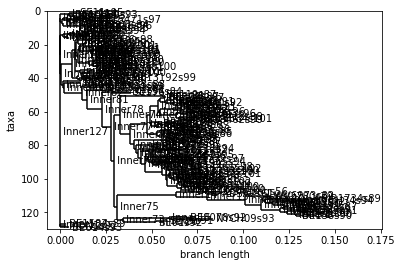

In [5]:
%matplotlib inline
import Bio.Phylo
import topology_inference

nj_tree = topology_inference.get_neighbor_joining_tree(sequence_dict)
Bio.Phylo.draw(nj_tree)

In [6]:
import subprocess

topology_inference.build_lsd_inputs(util.update_dict(config, n_taxa=n_taxa), build_templates, nj_tree, date_trait_string)
subprocess.run([config['lsd_executable']] + topology_inference.get_lsd_args(build_templates))

CompletedProcess(args=['lsd', '-c', '-r', 'a', '-i', 'out-data/rsv2/lsd-input.trees', '-d', 'out-data/rsv2/lsd-input.dates', '-w', 'out-data/rsv2/lsd-input.rates', '-o', 'out-data/rsv2/analysis-tree'], returncode=0)

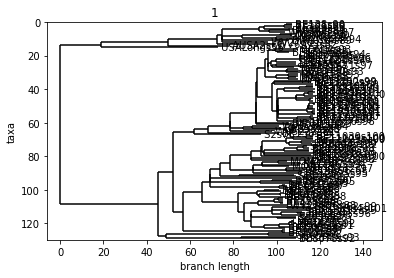

'(((((((((BE138s90:2.70797,BE191s90:2.70797):0.75594,BE369s90:3.46391):9.45985,MON9s91:13.92380):2.34362,(BIR642s89:9.53580,WV19983s87:7.53580):4.73159):16.79720,((((MON5s91:6.59180,MON51s90:5.59180):17.28360,(MON9s92:9.33180,NYCH34s94:11.33180):15.54360):9.18720,BIR1734s89:31.06260):0.00100,WV2780s79:21.06360):0.00100):2.30563,WV6973s82:26.37020):22.89790,AUSA2s61:28.26810):30.64600,USALongs56:53.91400):18.95060,((((((((((((BE614s93:10.89780,(MON1s92:8.52592,BE1587s89:5.52592):1.37183):2.79059,(((((((BE12005s94:0.00100,BE174s95:1.00100):0.19860,BE12350s96:2.19960):0.00100,BE12216s96:2.20060):0.00100,BE11600s94:0.20160):10.91640,SE10s92:9.11801):2.45641,((MAD6s92:9.19930,BE15471s97:14.19930):1.73860,SE03s91:9.93791):0.63651):1.11292,((MAD2s93:5.00592,BE10490s93:5.00592):0.69183,SE11s95:7.69775):7.98959):0.00100):1.57109,((NYCH17s93:4.56944,MAD6s93:4.56944):5.79889,(MAD8s92:3.79611,MAD1s93:4.79611):5.57222):4.89110):3.74320,(((BE13280s99:17.33560,BE13192s99:17.33560):0.00100,BE1061s100:

In [7]:
import io


lsd_tree = topology_inference.extract_lsd_tree(build_templates)    
analysis_newick_io = io.StringIO()
Bio.Phylo.write([lsd_tree], analysis_newick_io, format='newick')
analysis_newick = analysis_newick_io.getvalue()
Bio.Phylo.draw(lsd_tree)
analysis_newick

## BEAST analysis

In [8]:
import util
beast_args = util.get_beast_args(config)

def run_beast(xml_path, **kwargs):
    result = subprocess.run(beast_args + [xml_path], **kwargs)
    if result.returncode != 0:
        print(result.stderr)
        print(result.stdout)
        raise RuntimeError('BEAST run failed')
    else:
        print('Ran BEAST ({0}) successfully'.format(xml_path))

build_templates.build_beast_analysis(config, analysis_newick, date_trait_string, sequence_dict)
#run_beast(build_templates.beast_analysis_out_path)

PosixPath('out-data/rsv2/beast-analysis.xml')

In [9]:
beast_fixed_out_path = 'beast-fixed-analysis.xml'
beast_fixed_tree_file = 'beast-fixed-log.trees'
beast_fixed_trace_file = 'beast-fixed-log.log'

#build_templates.build_beast_analysis(util.update_dict(config, estimate_topology=False), analysis_newick, date_trait_string, sequence_dict,
#                                        out_file=beast_fixed_out_path, trace_file=beast_fixed_trace_file, tree_file=beast_fixed_tree_file)
#run_beast(build_templates.out_path / beast_fixed_out_path)

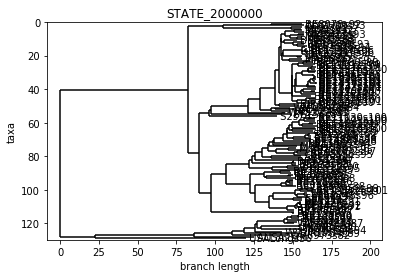

In [10]:
with open(build_templates.beast_analysis_tree_path) as f:
    beast_trees = list(Bio.Phylo.parse(f, format='nexus'))
    
Bio.Phylo.draw(beast_trees[-1])

In [11]:
import pandas as pd
beast_trace = pd.read_table(build_templates.beast_analysis_trace_path, comment='#', sep='\t')
beast_trace

/usr/lib/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


,Sample,posterior,likelihood,prior,treeLikelihood,TreeHeight,kappa,popSize,CoalescentConstant,freqParameter.1,freqParameter.2,freqParameter.3,freqParameter.4,ESS(TreeHeight.),ESS(popSize.),datetime
0,0,-10640.004921,-5922.267126,-4717.737794,-5922.267126,118.864510,2.000000,10.000000,-4711.946319,0.250000,0.250000,0.250000,0.250000,N,N,2019-06-23T07:00:50.243
1,1000,-6721.885275,-5873.838403,-848.046872,-5873.838403,121.276811,2.627186,226.562910,-837.438761,0.252269,0.254795,0.247561,0.245374,2.0,2.0,2019-06-23T07:00:50.628
2,2000,-6705.581431,-5854.161176,-851.420256,-5854.161176,128.883838,2.699161,308.707084,-840.199393,0.252269,0.254795,0.247561,0.245374,3.0,3.0,2019-06-23T07:00:50.775
3,3000,-6653.609446,-5795.191113,-858.418333,-5795.191113,135.653258,4.189379,264.645156,-846.992741,0.254157,0.252907,0.247561,0.245374,4.0,4.0,2019-06-23T07:00:50.98
4,4000,-6616.119482,-5756.629236,-859.490246,-5756.629236,145.518053,6.725851,263.189367,-847.398924,0.250168,0.258048,0.247561,0.244224,3.0,5.0,2019-06-23T07:00:51.141
5,5000,-6597.469221,-5737.181279,-860.287942,-5737.181279,150.830663,6.725851,288.281013,-848.023183,0.250168,0.258048,0.239810,0.251975,2.4,6.0,2019-06-23T07:00:51.346
6,6000,-6594.871928,-5740.196964,-854.674964,-5740.196964,137.685874,8.467189,262.098859,-842.210801,0.250168,0.258048,0.239810,0.251975,2.6,7.0,2019-06-23T07:00:51.495
7,7000,-6608.976409,-5754.910062,-854.066347,-5754.910062,135.040837,8.467189,266.776441,-841.568673,0.250168,0.258048,0.239810,0.251975,3.0,8.0,2019-06-23T07:00:51.656
8,8000,-6612.883378,-5746.913155,-865.970223,-5746.913155,141.683776,8.467189,287.683693,-853.328739,0.250168,0.258048,0.239810,0.251975,3.5,9.0,2019-06-23T07:00:51.795
9,9000,-6612.780463,-5745.944005,-866.836458,-5745.944005,161.325143,8.467189,301.979063,-854.101787,0.250168,0.258048,0.239810,0.251975,7.8,9.0,2019-06-23T07:00:51.91


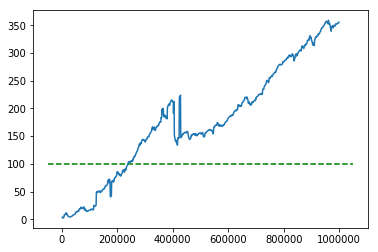

In [12]:
import matplotlib.pyplot as plt

ess_target = 100
to_include = 1000

plt.plot(np.arange(2, to_include)*config['log_every'], beast_trace['ESS(TreeHeight.)'][2:to_include].astype(float))
plt.hlines(ess_target, *plt.xlim(), linestyles='dashed', color='green')

## Variational analysis

In [13]:
import newick
import variational_analysis

tree = newick.loads(analysis_newick)[0]
model = variational_analysis.construct_model(config, tree, sequence_dict)
for RV in model.basic_RVs:
    print(RV.name, RV.logp(model.test_point))
print('tree likelihood', model.fn(model.potentials[0])(model.test_point))
print('total', model.logp_nojac(model.test_point))

model.test_point

/usr/lib/anaconda/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/usr/lib/anaconda/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/usr/lib/anaconda/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. I

pop_size_log__ -1.623530431077395


/usr/lib/anaconda/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


tree_tree_height_proportion__ -4764.5586269067935
kappa_log__ -1.172212853414342
pi_stickbreaking__ -3.753417975251508


/usr/lib/anaconda/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/usr/lib/anaconda/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


tree likelihood -5922.267055290037
total -10638.234074282085


/usr/lib/anaconda/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/usr/lib/anaconda/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


{'pop_size_log__': array(2.30258509),
 'tree_tree_height_proportion__': array([ 1.27599255, -1.00465852,  1.70737074,  0.4654037 , -0.31426768,
        -1.12845684, -0.51022106,  0.91225089, 10.3437598 ,  9.95530171,
         2.21223995,  0.02041779, -0.08076819,  1.04555459,  1.39330413,
         0.90494223, -5.29129275,  5.29631536,  5.30131288, -3.99173599,
         1.31155064,  1.6660472 ,  2.74811189,  2.25145069,  1.97903623,
        -0.33806808,  9.36626148,  1.81915345, -0.23827586, -0.38381668,
         0.64991762,  1.10126514,  9.76051747,  3.17335577,  0.12294682,
        -0.08639455,  1.34851812,  0.17459149,  0.09156531,  3.69690058,
        -1.99620439, -0.10914339, -0.69314177,  1.19362475,  7.74343447,
         1.15322356, -0.44941222, -1.46013005,  9.68711043,  9.62308691,
        -1.46017692, -0.18414405,  3.07464749,  9.66832329,  1.88323953,
         0.8995304 ,  3.83684351,  9.63731254,  0.24016788,  1.18045739,
         0.99110064, 10.01600251,  0.65829713,  1.459

  0%|          | 0/30000 [00:00<?, ?it/s]/usr/lib/anaconda/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/usr/lib/anaconda/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Average Loss = 13,720:   0%|          | 1/30000 [00:02<19:00:44,  2.28s/it]/usr/lib/anaconda/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequen

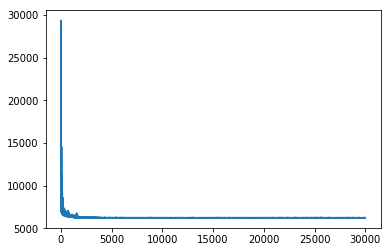

In [14]:
import pymc3 as pm
import pickle
import matplotlib.pyplot as plt

inference = variational_analysis.construct_inference(config, model)
tracker = pm.callbacks.Tracker(
   mu=inference.approx.shared_params['mu'].eval,
   rho=inference.approx.shared_params['rho'].eval
)

approx = inference.fit(config['n_iter'], callbacks=[tracker], obj_optimizer=pm.adam(learning_rate=0.01))

plt.plot(approx.hist)

In [24]:
inference.fit(1000)

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -march=broadwell -mmmx -mno-3dnow -msse -msse2 -msse3 -mssse3 -mno-sse4a -mcx16 -msahf -mmovbe -maes -mno-sha -mpclmul -mpopcnt -mabm -mno-lwp -mfma -mno-fma4 -mno-xop -mbmi -mbmi2 -mno-tbm -mavx -mavx2 -msse4.2 -msse4.1 -mlzcnt -mrtm -mhle -mrdrnd -mf16c -mfsgsbase -mrdseed -mprfchw -madx -mfxsr -mxsave -mxsaveopt -mno-avx512f -mno-avx512er -mno-avx512cd -mno-avx512pf -mno-prefetchwt1 -mclflushopt -mxsavec -mxsaves -mno-avx512dq -mno-avx512bw -mno-avx512vl -mno-avx512ifma -mno-avx512vbmi -mno-clwb -mno-pcommit -mno-mwaitx --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=3072 -mtune=generic -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/lib/anaconda/lib/python3.6/site-packages/numpy/core/include -I/usr/lib/anaconda/include/python3.6m -I/usr/lib/anaconda/lib/python3.6/site-package

OSError: [Errno 22] Invalid argument

In [17]:
variational_trace = approx.sample()

(array([  3.,   9.,  27.,  62., 105., 140.,  80.,  47.,  22.,   5.]),
 array([126.87680936, 131.23207603, 135.58734271, 139.94260938,
        144.29787606, 148.65314273, 153.00840941, 157.36367609,
        161.71894276, 166.07420944, 170.42947611]),
 <a list of 10 Patch objects>)

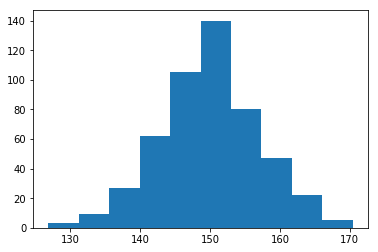

In [18]:
plt.hist(variational_trace.get_values('tree')[:, -1])

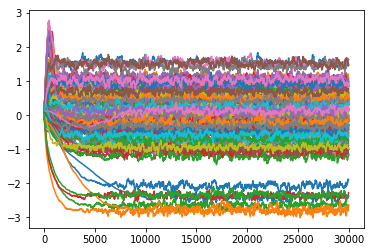

In [23]:
plt.plot(np.stack(tracker.hist['rho']));

(array([ 20.,  35.,  94., 105.,  98.,  84.,  36.,  18.,   7.,   3.]),
 array([234.18189313, 248.571916  , 262.96193887, 277.35196174,
        291.7419846 , 306.13200747, 320.52203034, 334.91205321,
        349.30207608, 363.69209895, 378.08212182]),
 <a list of 10 Patch objects>)

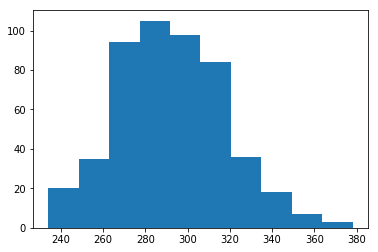

In [19]:
plt.hist(variational_trace.get_values('pop_size'))

In [20]:
with open(build_templates.pymc_analysis_result_path, 'wb') as f:
     pickle.dump(tracker, f)

In [21]:
with open(build_templates.out_path / 'pymc_approx.pickle', 'wb') as f:
    pickle.dump(approx, f)